In [57]:
# Working with data
import pandas as pd
import random

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.express as px

# Text analysis
import nltk  
stopword_list = nltk.corpus.stopwords.words('french')

# NLP
import spacy.cli
nlp = spacy.load("fr_core_news_sm")

# Hide warnings 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Read data

In [58]:
# Corpus with key words in the title
corpus_title = pd.read_csv('Corpus_Title.csv')
# Corpus with key words in the lead paragraph
corpus_lead = pd.read_csv('Corpus_Lead.csv')

In [59]:
print('Total number of records in the title dataset:', corpus_title.shape)

Total number of records in the title dataset: (12783, 6)


In [60]:
print('Total number of records in the lead dataset:', corpus_lead.shape)

Total number of records in the lead dataset: (35628, 6)


## Feature engineering and pre-processing

In [61]:
# Creating new column which indicate the key words search
corpus_title['key_words'] = 'title'
corpus_lead['key_words'] = 'lead'

In [62]:
# Merging two datasets
corpus = corpus_title.append(corpus_lead)

In [63]:
# Saving datasets as csv file
corpus.to_csv('corpus_full.csv', index = False, header=True)

In [64]:
print('Total number of records in the dataset:', corpus.shape)

Total number of records in the dataset: (48411, 7)


### Missing values

In [65]:
# Detecting the number of NA articles
corpus['content'].isna().sum()

262

In [66]:
# Deleting the NA datapoints from the dataset
corpus_complet = corpus[corpus['content'].notna()]

### Duplicates

In [67]:
# Detecting the duplicates in the content column 
corpus_complet[corpus_complet.duplicated(['content'], keep=False)]

,content,author,journal,title,date,ID,key_words
273,Business WireCognigy et Telekom s’associent da...,NaN,Yahoo!-France-(site-web-réf.)---Yahoo-France,Cognigy-et-Telekom-s’associent-dans-le-domaine...,2020-12-17,Cognigy-et-Telekom-s’associent-dans-le-domaine...,title
274,Business WireCognigy et Telekom s’associent da...,NaN,Yahoo!-Finance-France-(site-web-réf.)---Yahoo!...,Cognigy-et-Telekom-s’associent-dans-le-domaine...,2020-12-17,Cognigy-et-Telekom-s’associent-dans-le-domaine...,title
305,Cet article est paru dans Acteurs Publics,NaN,Acteurs-Publics,Le-gouvernement-incite-les-administrations-à-e...,2018-06-14,Le-gouvernement-incite-les-administrations-à-e...,title
306,Cet article est paru dans Acteurs Publics,NaN,Acteurs-Publics,Rapprochement-franco-britannique-sur-l'IA-et-l...,2018-07-05,Rapprochement-franco-britannique-sur-l'IA-et-l...,title
307,Cet article est paru dans Europe 1 (site web),Europe1-.fr-avec-AFP,Europe-1-(site-web),Google-inaugure-un-laboratoire-d'intelligence-...,2018-09-18,Google-inaugure-un-laboratoire-d'intelligence-...,title
...,...,...,...,...,...,...,...
34649,« Imaginez : vous faites votre jogging le dima...,NaN,Le-Parisien--Edition-Principale;-Paris;-Oise;-...,Mon-médecin-du-sport-personnel,2016-10-03,Mon-médecin-du-sport-personnelLe-Parisien--Edi...,lead
35245,"À l'heure de l'intelligence artificielle, KONE...",NaN,LSA-(site-web),Révolution-:-les-services-connectés-de-KONE-po...,2018-10-01,Révolution-:-les-services-connectés-de-KONE-po...,lead
35246,"À l'heure de l'intelligence artificielle, KONE...",NaN,LSA-(site-web),Révolution-:-les-services-connectés-de-KONE-po...,2018-09-10,Révolution-:-les-services-connectés-de-KONE-po...,lead
35572,États-Unis Une immigrée clandestine femme de m...,NaN,L'Union-(France)--Vitry,Insolites,2018-12-09,InsolitesL'Union-(France)--Vitry2018-12-09,lead


In [69]:
# Deleting the duplicates
corpus_complet.drop_duplicates(subset ="content",
                     keep = False, inplace = True)

<ipython-input-69-3ba7b45d5e6e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
print('Total number of records in the cleaned dataset:', corpus_complet.shape)

Total number of records in the cleaned dataset: (47175, 7)


### Time stamps

In [71]:
# Creating timestamps and new varibles for the timeframe analysis
corpus_complet['date_time'] = pd.to_datetime(corpus_complet['date'])
corpus_complet['date_month'] = corpus_complet['date_time'].dt.strftime('%Y-%m')
corpus_complet['date_year'] = corpus_complet['date_time'].dt.strftime('%Y')

<ipython-input-71-15915e968254>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-71-15915e968254>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-71-15915e968254>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
# Droping the few values from 2021 year
corpus_complet = corpus_complet[corpus_complet.date_year != '2021']

In [73]:
# Creating the distribution dataframe by month
dist_month = corpus_complet['date_month'].value_counts(ascending=True)
dist_month = dist_month.sort_index()

/Users/iuliia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



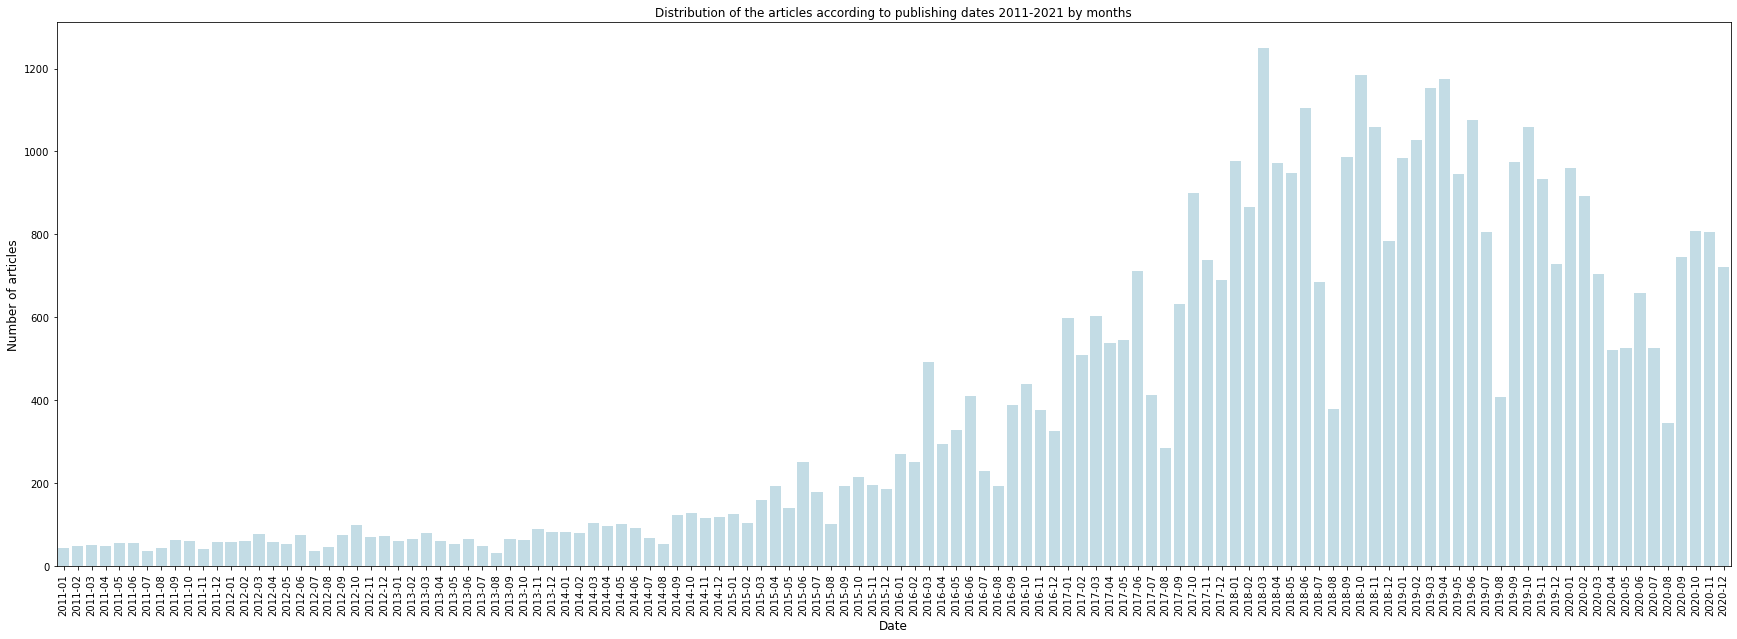

In [74]:
# Plot the distribution
plt.figure(figsize=(30,10))
sns.barplot(dist_month.index, dist_month.values, alpha=0.8, color='lightblue')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of articles', fontsize=12)
plt.title("Distribution of the articles according to publishing dates 2011-2021 by months")
plt.show()

In [75]:
# Creating the distribution dataframe by year
dist_year = corpus_complet['date_year'].value_counts(ascending=True)
dist_year = dist_year.sort_index()

/Users/iuliia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



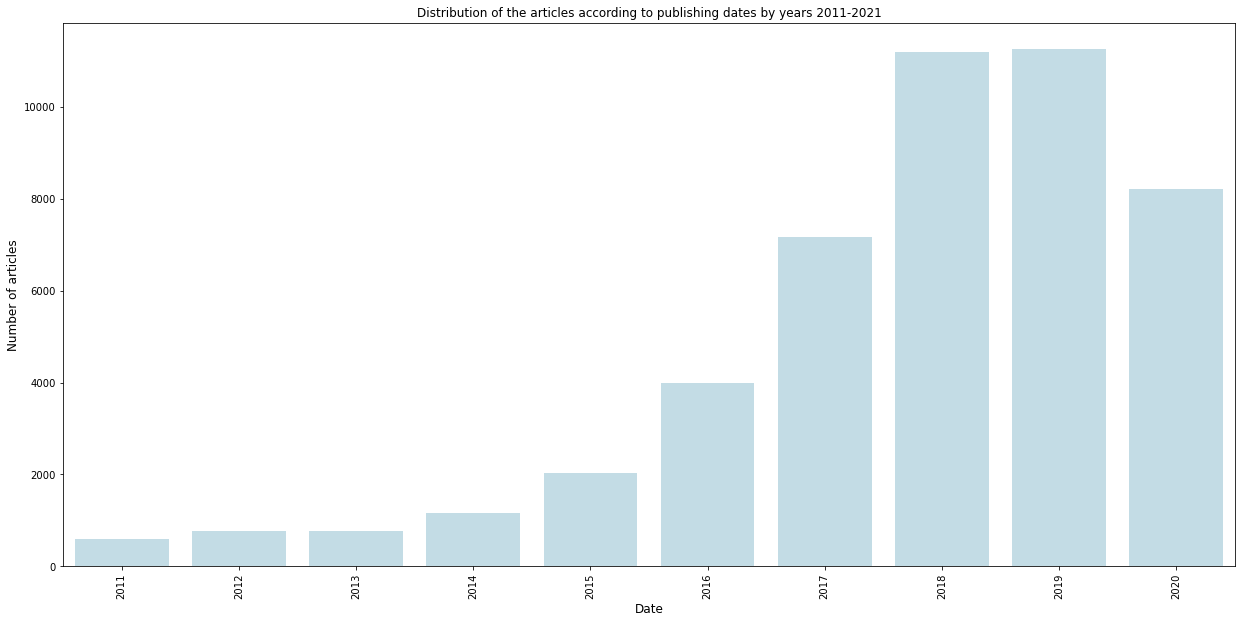

In [76]:
# Plot the distribution
plt.figure(figsize=(21,10))
sns.barplot(dist_year.index, dist_year.values, alpha=0.8, color='lightblue')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of articles', fontsize=12)
plt.title("Distribution of the articles according to publishing dates by years 2011-2021")
plt.show()

### Distribution of the articles by media

In [77]:
# Display total number of unique media names
corpus_complet['journal'].nunique()

7198

In [78]:
# Transforming media names to the same format
corpus_complet['journal_clean'] = corpus_complet['journal'].str.replace("--", '')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace("(", '')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(")", '')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace("-site-web", '')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(".fr", '')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(".com", '')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace("-", ' ')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'\,.+','')

corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Echos).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Monde).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Tribune).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=AGEFI).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Parisien).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Sud Ouest).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=La Provence).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Paris Normandie).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Le Huffington Post).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Presse Océan).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=La Croix).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Ouest France).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Midi Libre).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Le Progrès Lyon).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Corse Matin).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=La Montagne).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Républicain).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=La République du Centre).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Indépendant).*$','')
corpus_complet['journal_clean'] = corpus_complet['journal_clean'].str.replace(r'(?<=Le Courrier de lOuest).*$','')

<ipython-input-78-f099407db127>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-78-f099407db127>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-78-f099407db127>:6: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-78-f099407db127>:7: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-78-f099407db127>:9: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-78-f099407db127>:11: FutureWarning:

The default value of regex will change from True to False in a future version.


In [79]:
# Total number of media sources after cleaning
corpus_complet['journal_clean'].nunique()

707

In [80]:
# Creating the media distribution dataframe by number of articles published
dist_media = corpus_complet['journal_clean'].value_counts()
# top 50 most active media
dist_media50 = dist_media.head(50)
dist_media50

Les Echos                            3696
L'Usine Nouvelle                     3110
La Tribune                           1984
Le Figaro                            1683
Le Monde                             1675
Ouest France                         1395
IT for Business                       891
Sciences et Avenir                    879
L'AGEFI                               818
Sud Ouest                             799
Aujourd'hui en France                 776
Industrie et Technologies             728
Le Point                              727
Libération                            675
Midi Libre                            656
La Provence                           584
Boursier                              541
Challenges                            536
Le Télégramme Bretagne                529
L'Obs                                 523
Le Progrès Lyon                       501
20 Minutes                            475
La Correspondance de la Publicité     464
E marketing                       

In [81]:
# Top 30 most active media
dist_media30 = dist_media.head(30)

/Users/iuliia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



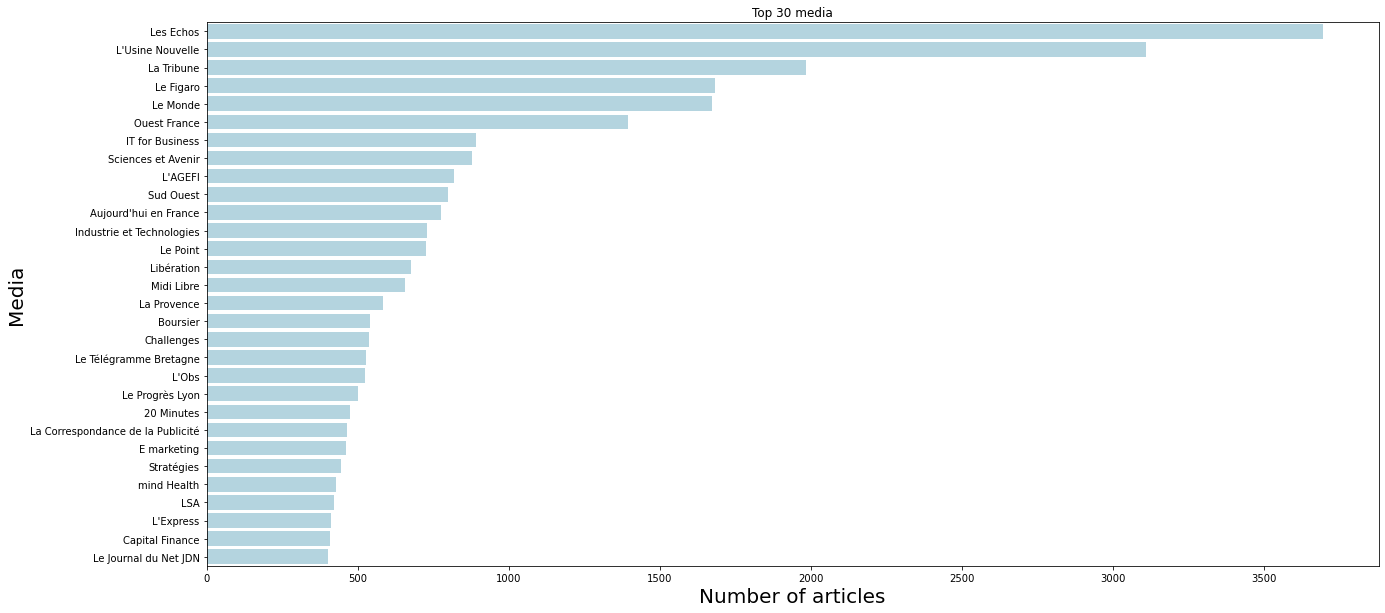

In [82]:
# Media distribution visualization
plt.figure(figsize=(21,10))
sns.barplot(dist_media30.values, dist_media30.index, color='lightblue')
plt.xticks(rotation='horizontal')
plt.xlabel('Number of articles', fontsize=20)
plt.ylabel('Media', fontsize=20)
plt.title("Top 30 media")
plt.show()

#### Matching dataframe with media cathegories

In [83]:
# Dataframe with media cathegories extracted from Europress
media_df = pd.read_excel('media_cat.xls')
#media_df.rename(columns = {'name':'journal'}, inplace = True)
media_df.head(10)

,journal,category
0,01 net,national
1,20 Minutes,national
2,ABC Bourse,national
3,Acta Endoscopica,national
4,Acteurs Publics,national
5,Action Co,national
6,Actu Labo,national
7,Actualités Sociales Hebdo - Numéros juridiques,national
8,Actualités Sociales Hebdomadaires,national
9,Actu-Environnement,national


In [84]:
media_df['journal_clean'] = media_df['journal'].astype(str) 

In [85]:
# Cleaning the media names values
media_df['journal_clean'] = media_df['journal_clean'].str.replace("--", '')
media_df['journal_clean'] = media_df['journal_clean'].str.replace("(", '')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(")", '')
media_df['journal_clean'] = media_df['journal_clean'].str.replace("-site-web", '')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(".fr", '')
media_df['journal_clean'] = media_df['journal_clean'].str.replace("-", ' ')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'\,.+','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Echos).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Monde).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Tribune).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=AGEFI).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Parisien).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Sud Ouest).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=La Provence).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Paris Normandie).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Le Huffington Post).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Presse Océan).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=La Croix).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Ouest France).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Midi Libre).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Le Progrès Lyon).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Corse Matin).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=La Montagne).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Républicain).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=La République du Centre).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Indépendant).*$','')
media_df['journal_clean'] = media_df['journal_clean'].str.replace(r'(?<=Le Courrier de lOuest).*$','')

<ipython-input-85-48b2ecb6e3b3>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-85-48b2ecb6e3b3>:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-85-48b2ecb6e3b3>:6: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-85-48b2ecb6e3b3>:8: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-85-48b2ecb6e3b3>:9: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-85-48b2ecb6e3b3>:10: FutureWarning:

The default value of regex will change from True to False in a future version.


In [86]:
# Merging two dataframes
df = pd.merge(corpus_complet, media_df, on='journal_clean')

In [87]:
# Creating the dataframe for the media types distribution
df["date_year"] = df.date_year.astype(int)
media_cat = df.value_counts(["category", "date_year"])
media_cat = media_cat.reset_index().rename(columns={'category': 'category', 0:'count'})

In [88]:
# Visualization of the distribution
fig = px.area(media_cat, x='date_year', y='count', color='category', title='Media categories and articles frequency over time')
fig.show()

In [89]:
# Normalized values
fig = px.area(media_cat, x='date_year', y='count', color='category', title='Media categories and articles frequency over time', groupnorm='fraction')
fig.show()

### Cleaning the author column values

In [90]:
corpus_complet['author'] = corpus_complet['author'].str.replace("-", ' ')

In [91]:
corpus_complet['author'].nunique()

8788

In [92]:
authors_media = corpus_complet.value_counts(["author", "journal"])
authors_media = authors_media.reset_index().rename(columns={'index': 'author', 0:'count'})

In [93]:
# Saving the names of the articles authors for the Twitter analysis
authors_media.to_excel('media_authors.xlsx', index = False, header=True, encoding='utf-8')

### Cleaning the title column values

In [94]:
corpus_complet['title']

198                 IA-contre-DC:-le-match-n’aura-pas-lieu
199                     IA-:-comment-la-Chine-veut-briller
200      [l'intelligence--artificielle-est-l'ensemble-d...
201      L’avocat-sera-t-il-remplacé-par-une--intellige...
202      [watson-et-les-banquesL'intelligence--artifici...
                               ...                        
35623                      Des-subventions-qui-interrogent
35624                     Je-vends-(ou-transmets)-mon-bien
35625      J’achète-un-logement-pour-l’occuper-ou-le-louer
35626            Les-inquiétudes-d’un-ancien-élu-noyantais
35627      Les-esclaves-antiques,-ancêtres-de-nos-robots-?
Name: title, Length: 47162, dtype: object

In [95]:
corpus_complet['title_clean'] = corpus_complet['title'].str.replace("-", ' ')
corpus_complet['title_clean'] = corpus_complet['title_clean'].str.replace("[", '')
corpus_complet['title_clean'] = corpus_complet['title_clean'].str.replace("]", '')

<ipython-input-95-24a0dc1c5f83>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-95-24a0dc1c5f83>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [96]:
corpus_complet['title_clean']

198                 IA contre DC: le match n’aura pas lieu
199                     IA : comment la Chine veut briller
200      l'intelligence  artificielle est l'ensemble de...
201      L’avocat sera t il remplacé par une  intellige...
202      watson et les banquesL'intelligence  artificie...
                               ...                        
35623                      Des subventions qui interrogent
35624                     Je vends (ou transmets) mon bien
35625      J’achète un logement pour l’occuper ou le louer
35626            Les inquiétudes d’un ancien élu noyantais
35627      Les esclaves antiques, ancêtres de nos robots ?
Name: title_clean, Length: 47162, dtype: object

### Creating unique ID column

In [97]:
n = []
for i in corpus_complet.index:
    n.append(random.randint(10000,100000))
corpus_complet['unique_id'] = n

### Creating final dataframe

In [98]:
corpus_complet_short = corpus_complet[['unique_id', 'author','journal_clean', 'content', 'date', 'date_month', 'date_year', 'title_clean', 'key_words']]

In [99]:
print('Total number of records in the final dataset:', corpus_complet_short.shape)

Total number of records in the final dataset: (47162, 9)


In [100]:
# Saving dataset in the csv file
corpus_complet_short.to_csv('corpus_FE.csv', index = False, header=True)